# Problem Set 4: Overlapping Generation Models
## Chapter 2: 3-period-lived agents with exogenous labor supply

### Exercise 2.1

In [33]:
import numpy as np
from scipy.optimize import root

# Initialize parameters
β = 0.442
δ = 0.6415
σ = 3
A = 1
α = 0.35
nvec = np.array([1., 1., 0.2])


# Define functions
r_f = lambda b2, b3 : (α * A * (np.sum(nvec) / (b2 + b3))**(1-α) - δ)
w_f = lambda b2, b3 : ((1-α) * A * ((b2 + b3)/np.sum(nvec))**(α))
up = lambda c : c**(-σ)

# Def system of equations to solve for the optimization pb
def system(bvec_guess):    
    b2 = bvec_guess[0]
    b3 = bvec_guess[1]
    r = r_f(b2,b3)
    w = w_f(b2, b3)
    
    vp1 = up(w*nvec[0] - b2) - β*(1+r)*up(w*nvec[1] + (1+ r)*b2-b3)
    vp2 = up(w*nvec[1] + (1 + r)*b2 - b3) - β*(1+ r)*up((1+r)*b3 + nvec[2]*w)
    
    return[vp1, vp2]

def solve(bvec_guess):
    
    b2, b3 = root(system, bvec_guess).x
    
    c1 = w_f(b2, b3)*nvec[0] - b2
    c2 = w_f(b2, b3)*nvec[1] - b3 + b2*(1+r_f(b2, b3))
    c3 = w_f(b2, b3)*nvec[2] + b3*(1+r_f(b2, b3))

    return[b2, b3, c1, c2, c3]


def feasible(f_params, bvec_guess):
    
    nvec, A, α, δ, β = f_params
    
    # Set up pb
    b_cnstr = np.empty([2,], dtype='bool_')
    c_cnstr = np.empty([3,], dtype='bool_')
    K_cnstr = np.empty([1,], dtype='bool_')    
    
    # Compute Cs & bs (optimize)
    X = solve(bvec_guess)
    Bs = X[0:2]
    Cs = X[2:5]
    K = np.sum(Bs)
    
    # Print results
    print("Expected return is", r_f(Bs[0], Bs[1]))

    print("Savings in periods 1 and 2 are ", Bs)
    print("Consumption in periods 1, 2 and 3 are ", Cs)

    ### Check constrains       
    # K_cnstr
    if K <= 0:
        K_cnstr[0] = True 
    else:
        K_cnstr[0] = False
    
    # C_cnstr
    for i in range(3):
        if Cs[i] <= 0:
            c_cnstr[i] = True
        else:
            c_cnstr[i] = False
            
    # b_cnstr
    b_cnstr[:] = False
        
    if c_cnstr[0] == True:
        b_cnstr[0] = True
    if c_cnstr[1] == True:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2] == True:
        b_cnstr[1] = True

    
    return print("\n Borrowing constraints in periods 1 and 2 are violated \t \t: ", b_cnstr, \
                 "\n Consumption constrains in periods 1, 2 and 3 are violated \t: ", c_cnstr, \
                 "\n The captial market clearing condition is violated \t \t: ", K_cnstr)

#### 2.2.A

In [ ]:
f_params = (nvec, A, α, δ, β)
bvec_guess = np.array([1.0, 1.2])
feasible(f_params, bvec_guess)

#### 2.2.B

In [ ]:
f_params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.06, -0.001])
feasible(f_params, bvec_guess)

#### 2.2.C

In [34]:
f_params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.1, 0.1])
feasible(f_params, bvec_guess)

Expected return is 2.433062339127069
Savings in periods 1 and 2 are  [0.019312529832027088, 0.05841109592113676]
Consumption in periods 1, 2 and 3 are  [0.18241212755849867, 0.20961468030898922, 0.24087386507209851]

 Borrowing constraints in periods 1 and 2 are violated 	 	:  [False False] 
 Consumption constrains in periods 1, 2 and 3 are violated 	:  [False False False] 
 The captial market clearing condition is violated 	 	:  [False]


## Exercise 2.2

In [53]:
import time
from matplotlib import pyplot as plt


def get_SS(params, bvec_guess, SS_graphs):
    
    
    start_time = time.clock()

    # Initialize parameters
    nvec, A, α, δ, β = params
    
    # Solve the optimal c and s
    X = solve(bvec_guess)
    b_ss = X[0:2]
    c_ss = X[2:6]
    K_ss = np.sum(b_ss)
    L_ss = np.sum(nvec)
    

    # Compute Euler error
    r_ss = r_f(b_ss[0], b_ss[1])
    w_ss = w_f(b_ss[0], b_ss[1])
    EulErr_ss = np.array([0., 0.])
    EulErr_ss[0] = up(w_ss*nvec[0] - b_ss[0]) - β*(1+r_ss)*up(w_ss*nvec[1] + (1+ r_ss)*b_ss[0]-b_ss[1])
    EulErr_ss[1] = up(w_ss*nvec[1] + (1 + r_ss)* b_ss[0] -  b_ss[1]) - β*(1+ r_ss)*up((1+r_ss)* b_ss[1] + nvec[2]*w_ss)
    
    # Compute resource constraint errors
    Y_ss = A*K_ss**α*L_ss**(1-α)
    RCerr_ss = 0
    RCerr_ss = Y_ss - np.sum(c_ss) - δ*K_ss
    
    ss_time = time.clock() - start_time
    ss_output = {
        "b_ss": b_ss,
        "c_ss": c_ss,
        "w_ss": w_ss,
        "r_ss": r_ss,
        "K_ss": K_ss,
        "Y_ss": Y_ss,
        "C_ss": c_ss,
        "EulErr_ss": EulErr_ss,
        "RCerr_ss": RCerr_ss,
        "ss_time": ss_time}
    
    if SS_graphs == True:
        plt.plot([20, 40, 60], c_ss, '-r')
        plt.title("Consumption Distribution over lifetime")
        plt.show()
        plt.plot([20, 40, 60], [b_ss[0], b_ss[1], 0], '-g')
        plt.title("Savings Distribution over lifetime")
        plt.show()
        
    return ss_output

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


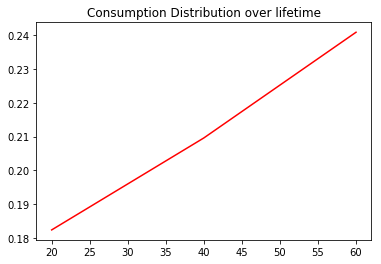

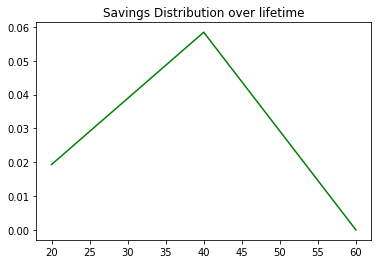

{'b_ss': [0.019312529832027088, 0.05841109592113676],
 'c_ss': [0.18241212755849867, 0.20961468030898922, 0.24087386507209851],
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': [0.18241212755849867, 0.20961468030898922, 0.24087386507209851],
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0008109999999996731}

In [54]:
params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True



get_SS(params, bvec_guess, True)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


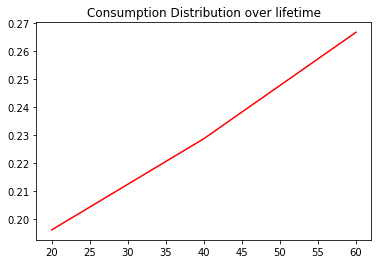

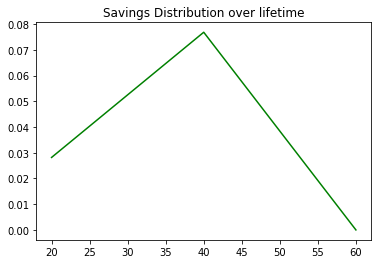

{'b_ss': [0.028176918915182085, 0.07686545131079861],
 'c_ss': [0.19597527701928497, 0.2286159413839988, 0.26669307195186887],
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': [0.19597527701928497, 0.2286159413839988, 0.26669307195186887],
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0006130000000004188}

In [55]:
β = 0.55
params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True

get_SS(params, bvec_guess, True)


If $\beta$ increases, ie households become more patient: people save more in each period of their life ($b$ increases). This increases the capital in the production function and therefore the total production $Y$. 
This allows households to consume more in each period of their life.

## Exercise 2.3